In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import pickle

In [27]:
df = pd.read_csv('exercise_dataset.csv')

X = df['Calories Burn']  
Y = df['BMI']

In [28]:
# Cek jumlah baris dan kolom
print(f"\nJumlah baris dan kolom: {df.shape}")

# Cek missing value
print("\nCek missing value:")
print(df.isnull().sum())

# Cek data duplikat
print("\nJumlah data duplikat:")
print(df.duplicated().sum())

# Cek statistik deskriptif
print("\nStatistik deskriptif:")
print(df.describe())


Jumlah baris dan kolom: (3864, 12)

Cek missing value:
ID                    0
Exercise              0
Calories Burn         0
Dream Weight          0
Actual Weight         0
Age                   0
Gender                0
Duration              0
Heart Rate            0
BMI                   0
Weather Conditions    0
Exercise Intensity    0
dtype: int64

Jumlah data duplikat:
0

Statistik deskriptif:
                ID  Calories Burn  Dream Weight  Actual Weight          Age  \
count  3864.000000    3864.000000   3864.000000    3864.000000  3864.000000   
mean   1932.500000     301.861806     75.139263      75.188440    39.621118   
std    1115.585048     115.828604     14.545824      14.845511    12.521721   
min       1.000000     100.009403     50.001984      45.783747    18.000000   
25%     966.750000     202.168837     62.373585      62.476906    29.000000   
50%    1932.500000     299.742508     75.522136      75.544407    40.000000   
75%    2898.250000     404.143688     87.7

Column names in the DataFrame:
Index(['ID', 'Exercise', 'Calories Burn', 'Dream Weight', 'Actual Weight',
       'Age', 'Gender', 'Duration', 'Heart Rate', 'BMI', 'Weather Conditions',
       'Exercise Intensity'],
      dtype='object')
Missing values in the dataset:
ID                    0
Exercise              0
Calories Burn         0
Dream Weight          0
Actual Weight         0
Age                   0
Gender                0
Duration              0
Heart Rate            0
BMI                   0
Weather Conditions    0
Exercise Intensity    0
dtype: int64

Hasil Training Model:
Intercept (b0): 26.68
Koefisien (b1):
Fitur Calories Burn: 0.00

Evaluasi Model:
Mean Squared Error (MSE): 22.03
R-squared Score (R²): -0.00


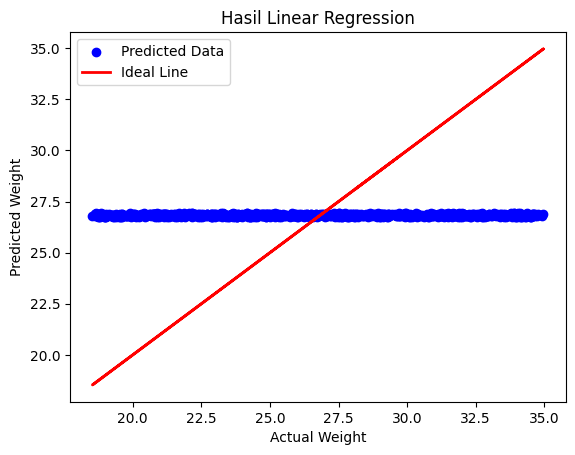

Model berhasil disimpan sebagai 'linear_model.pkl'


In [29]:
# Load the data
df = pd.read_csv('exercise_dataset.csv')

# Print the column names to ensure they are correct
print("Column names in the DataFrame:")
print(df.columns)

# Define the features and target variable
X = df[['Calories Burn']]  # Ensure X is a DataFrame
Y = df['BMI']     # Y is a Series

# Check for missing values
print("Missing values in the dataset:")
print(df.isnull().sum())

# 2. Split the dataset into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, test_size=0.2, random_state=42)

# 3. Create a Linear Regression model
model = LinearRegression()
model.fit(X_train, Y_train)  # Train the model

# 4. View model results
print("\nHasil Training Model:")
print(f"Intercept (b0): {model.intercept_:.2f}")
print("Koefisien (b1):")
for i, coef in enumerate(model.coef_):
    print(f"Fitur {X.columns[i]}: {coef:.2f}")

# 5. Make predictions on the test data
Y_pred = model.predict(X_test)

# 6. Evaluate the model
mse = mean_squared_error(Y_test, Y_pred)
r2 = r2_score(Y_test, Y_pred)

print("\nEvaluasi Model:")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R-squared Score (R²): {r2:.2f}")

# 7. Visualize the regression results
plt.scatter(Y_test, Y_pred, color="blue", label="Predicted Data")
plt.plot(Y_test, Y_test, color="red", linewidth=2, label="Ideal Line")
plt.xlabel("Actual Weight")
plt.ylabel("Predicted Weight")
plt.legend()
plt.title("Hasil Linear Regression")
plt.show()

# Save the trained model
with open("linear_model.pkl", "wb") as file:
    pickle.dump(model, file)

print("Model berhasil disimpan sebagai 'linear_model.pkl'")

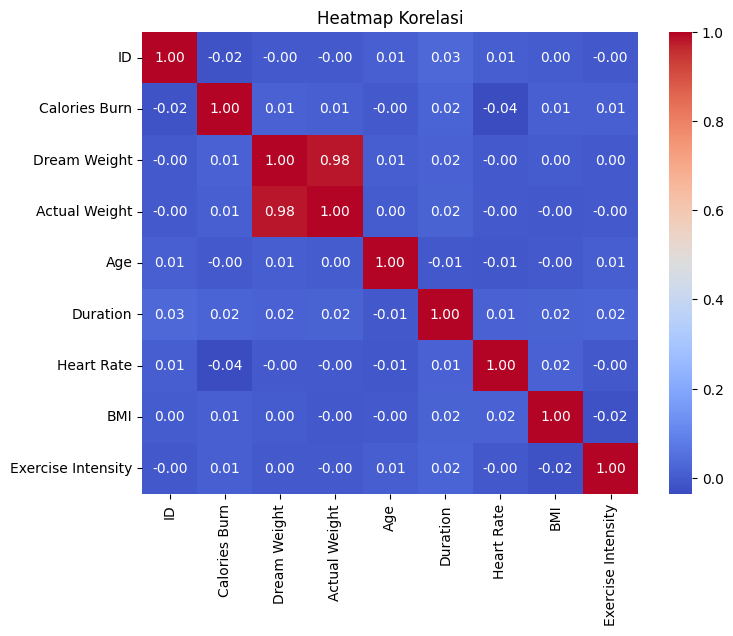

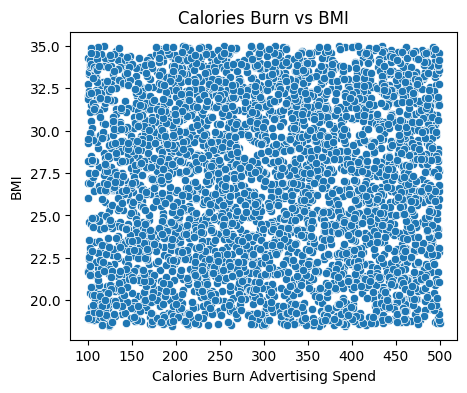

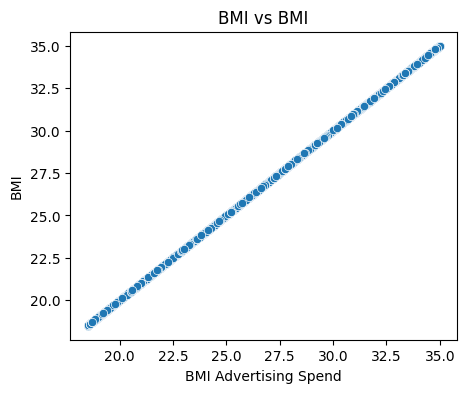

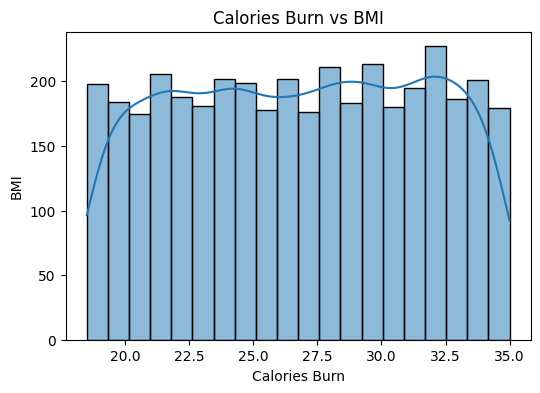

In [30]:
# Baca file CSV
df_cleaned = pd.read_csv('exercise_dataset.csv')  # Gantilah dengan nama file yang sesuai

# 1. Korelasi antar variabel
# Pilih hanya kolom numerik
numeric_df = df_cleaned.select_dtypes(include=['number'])

plt.figure(figsize=(8, 6))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Heatmap Korelasi')
plt.show()

# 2. Scatter plot tiap fitur terhadap BMI
features = ['Calories Burn', 'BMI']  
for col in features:
    plt.figure(figsize=(5, 4))
    sns.scatterplot(x=col, y='BMI', data=df_cleaned) 
    plt.title(f'{col} vs BMI')
    plt.xlabel(f'{col} Advertising Spend')  # Sesuaikan label jika perlu
    plt.ylabel('BMI')
    plt.show()

# 3. Distribusi target (BMI)
plt.figure(figsize=(6, 4))
sns.histplot(df_cleaned['BMI'], kde=True, bins=20) 
plt.title('Calories Burn vs BMI')
plt.xlabel('Calories Burn')
plt.ylabel('BMI')
plt.show()